In [278]:
import pandas as pd
import numpy as np

In [279]:
customers = pd.read_csv("/Users/prathameshbodhankar/Downloads/segmentation data.csv")

In [280]:
customers.head()


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [281]:
print(customers.shape)

(2000, 8)


In [282]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [283]:
customers.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


/Users/prathameshbodhankar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

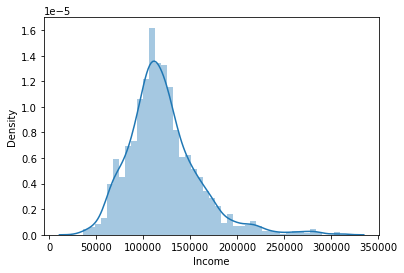

In [284]:
import seaborn as sns
sns.distplot(customers.Income)

/Users/prathameshbodhankar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

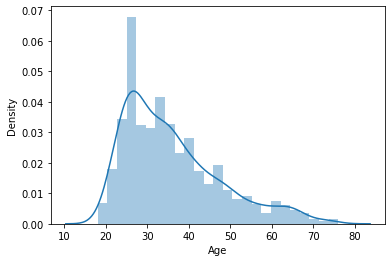

In [285]:
sns.distplot(customers.Age)

/Users/prathameshbodhankar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

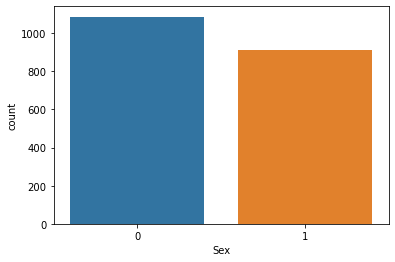

In [286]:
sns.countplot(customers.Sex)

/Users/prathameshbodhankar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

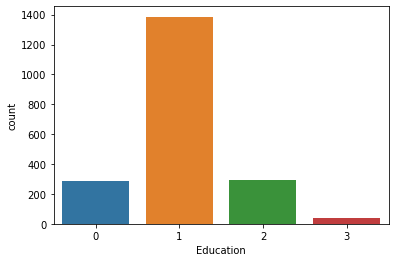

In [287]:
sns.countplot(customers.Education)

/Users/prathameshbodhankar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

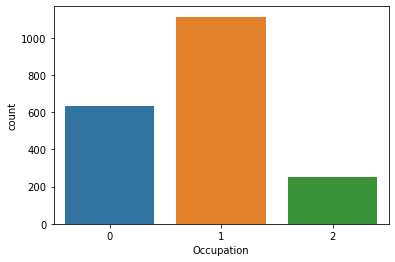

In [288]:
sns.countplot(customers.Occupation)

In [289]:
# dropping outliers from Income

def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    df_filtered = df[(df[col_name]>= q1 - 1.5**iqr) & (df[col_name] <= q3 + 1.5 * iqr)]
    return df_filtered
cusotmers = remove_outliers(customers, 'Income')

<ipython-input-289-7ce302963616>:7: RuntimeWarning: overflow encountered in double_scalars
  df_filtered = df[(df[col_name]>= q1 - 1.5**iqr) & (df[col_name] <= q3 + 1.5 * iqr)]


/Users/prathameshbodhankar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

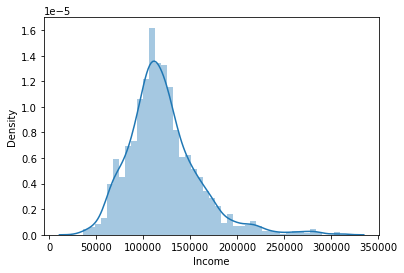

In [290]:
sns.distplot(customers.Income)

In [291]:
customers = customers.drop('ID', axis = 1)

In [292]:
print(customers.shape)

(2000, 7)


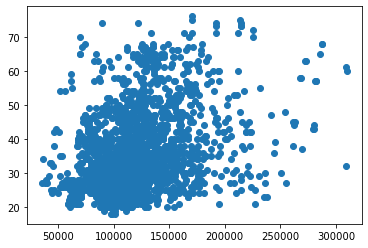

In [293]:
import matplotlib.pyplot as plt
plt.scatter(customers.Income, customers.Age)

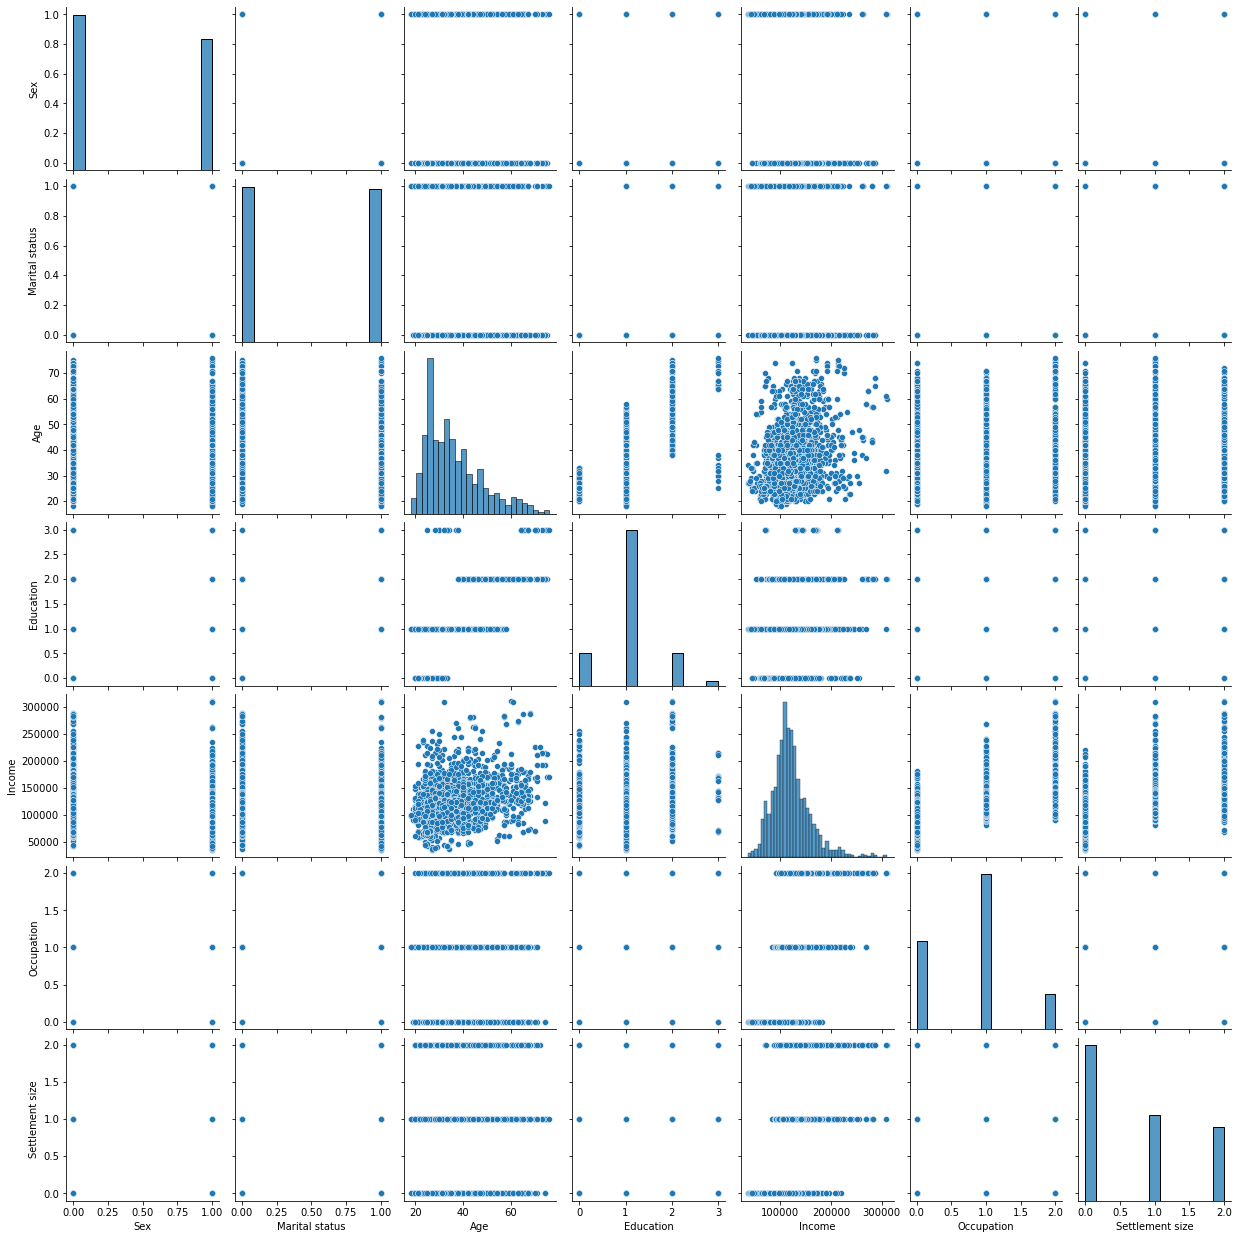

In [294]:
sns.pairplot(customers)
plt.show()

In [295]:
customers.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [262]:
# wcss = []
# for k in range(1,11): 
#     from sklearn.cluster import KMeans
#     kmeans = KMeans(n_clusters = k, init = 'k-means++')
#     kmeans.fit(customers)
#     wcss.append(kmeans.inertia_)
# wcss


In [263]:
# plt.plot(range(1,11), wcss, marker = '*')
# plt.xticks(range(1,11))
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

In [264]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = True)
# customers['km_clusters'] = kmeans.fit_predict(customers)


In [265]:
# from sklearn.metrics import silhouette_score
# from sklearn.cluster import KMeans
# from sklearn.datasets import make_blobs


In [266]:
# score = silhouette_score(customers, customers['km_clusters'])
# print(f"sil score: {score}")

A silhoutte score of 0.54 indicates moderate clustering quality. for k = 4. lets retry for k = 5. Indicates no change. Lets check if it gets worse atleast for score of 2. 

for k =2, the clustering score infact improves to 0.58. lets see for k = 7 iof there's a change in k score.  for k = 7, k score dips ddown to 0.53. indication deviation from optimal point. 


In [267]:
customers.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [268]:
# sns.distplot(customers.km_clusters)

Adding silhoutte Score to understand the inter and intra cluster separation

In [269]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

In [270]:
dbscan = DBSCAN(eps = 49, min_samples= 99)
customers['db'] = dbscan.fit_predict(customers)

In [271]:
customers.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,db
0,0,0,67,2,124670,1,2,-1
1,1,1,22,1,150773,1,2,-1
2,0,0,49,1,89210,0,0,-1
3,0,0,45,1,171565,1,1,-1
4,0,0,53,1,149031,1,1,-1


In [272]:
filtered_label = customers.loc[customers['db'] != -1, 'db']
filtered_data = customers.loc[customers['db'] != -1]

In [273]:
if len(set(filtered_label)) > 1:  # Silhouette score requires at least 2 clusters
    score = silhouette_score(filtered_data, filtered_label)
    print(f"Silhouette Score: {score}")
else:
    print("Not enough clusters to calculate Silhouette Score.")

Not enough clusters to calculate Silhouette Score.


Maybe the data lacks dense regions. So check the density and distribution across the bdata. 

